Допустим, у нас есть $n$ товаров с заданными стоимостями $v_i$ и массой $w_i$. В сумку убирается $С$ кг. Сколько какого товара взять, чтобы сумма всех стоимостей товаров была наибольшей?

In [1]:
values = [4, 2, 1, 7, 3, 6]
weights = [5, 9, 8, 2, 6, 5]
C = 15
n = 6

Сформулируем задачу:
$$\max\sum v_i x_i$$
$$\sum w_i x_i \leq C $$

Как должна выглядеть задача:
$$\min c^T x$$
$$A x \leq b $$

Получается, что $c=-v$, $A=w^T$, $b=(C)$

In [14]:
import numpy as np

c = - np.array(values)
A = np.array(weights, ndmin=2)
b = np.array([C])

In [17]:
linprog(c=c, A_ub=A, b_ub=b)

     con: array([], dtype=float64)
     fun: -52.50000000003075
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([-2.24904539e-11])
  status: 0
 success: True
       x: array([6.18738537e-14, 1.05853307e-12, 1.21475944e-13, 7.50000000e+00,
       4.00246695e-13, 4.71394166e-13])

In [2]:
import numpy as np

In [8]:
c = - np.array(values)
A = np.array(weights)         #shape = (6,)
A = np.expand_dims(A, 0)      #shape = (1,6)
b = np.array([C])

In [16]:
from scipy.optimize import linprog

In [10]:
linprog(c=c, A_ub=A, b_ub=b)

     con: array([], dtype=float64)
     fun: -52.50000000000001
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([-1.77635684e-15])
  status: 0
 success: True
       x: array([0. , 0. , 0. , 7.5, 0. , 0. ])

In [23]:
!pip install cvxopt

In [18]:
import cvxpy

In [25]:
x = cvxpy.Variable(shape=n, integer = True)

In [26]:
constraint = (A @ x <= b)
total_value = c * x

c:\users\voytik\anaconda3\envs\ds\lib\site-packages\cvxpy\expressions\expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)


In [29]:
problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=[constraint])

TypeError: __init__() got an unexpected keyword argument 'solver'

In [30]:
problem.solve(solver='ECOS_BB')

-138412039.00000018

In [31]:
x.value

array([ 8388608.00000001, -8388608.00000001, -8388608.00000001,
        8388608.00000001,  6990509.00000001,  8388608.00000001])

Теперь положительные $x$

In [32]:
x = cvxpy.Variable(shape=n, integer=True)
constraint = (A @ x <= b)
x_positive = (x >= 0)
total_value = c * x
problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=[constraint, x_positive])
problem.solve(solver='ECOS_BB')

c:\users\voytik\anaconda3\envs\ds\lib\site-packages\cvxpy\expressions\expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 3 times so far.

  warnings.warn(msg, UserWarning)
c:\users\voytik\anaconda3\envs\ds\lib\site-packages\cvxpy\problems\problem.py:1278: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


-49.00000001590603

In [33]:
x.value

array([7.01265807e-10, 7.99333027e-10, 3.58703130e-10, 7.00000000e+00,
       4.67143021e-10, 9.34955115e-10])

Теперь $x = 0$ или $1$

In [35]:
x = cvxpy.Variable(shape=n, boolean=True)
constraint = A @ x <= b
x_positive = x >= 0
total_value = c * x
problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=[constraint, x_positive])
problem.solve(solver='ECOS_BB')

c:\users\voytik\anaconda3\envs\ds\lib\site-packages\cvxpy\expressions\expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 5 times so far.

  warnings.warn(msg, UserWarning)


-17.00000000382157

In [36]:
x.value

array([1.00000000e+00, 2.25474413e-10, 2.07396078e-10, 1.00000000e+00,
       2.24003299e-10, 1.00000000e+00])

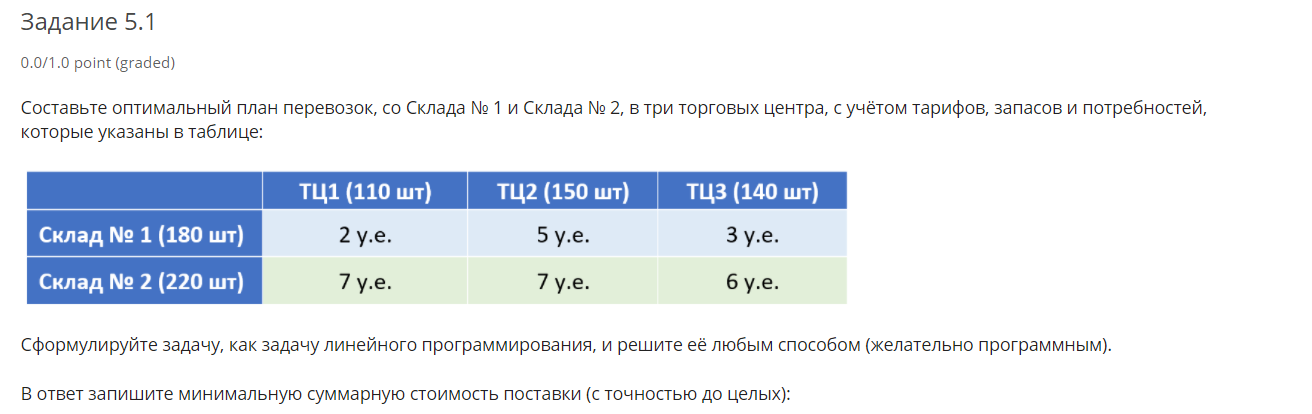

In [37]:
c = np.array([[2, 5, 3], [7, 7, 6]])
x = cvxpy.Variable(shape=c.shape, integer=True)

In [44]:
constraint = [ 
    cvxpy.sum(x[0]) <= 180,
    cvxpy.sum(x[1]) <= 220,
    cvxpy.sum(x[:, 0]) == 110,
    cvxpy.sum(x[:, 1]) == 150,
    cvxpy.sum(x[:, 2]) == 140,
    x >= 0
]
total_value = cvxpy.sum(cvxpy.multiply(c, x))

In [46]:
problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=constraint)
problem.solve(solver='ECOS_BB')

1900.0000000102357

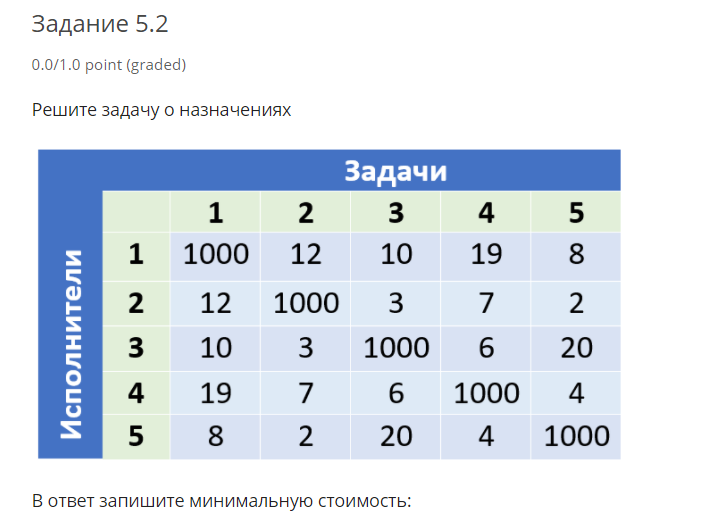

In [50]:
c = np.array([[1000, 12, 10, 19, 8],
              [12, 1000, 3, 7, 2], 
              [10, 3, 1000, 6, 20], 
              [19, 7, 6, 1000, 4], 
              [8, 2, 20, 4, 1000]])

In [52]:
x = cvxpy.Variable(shape=c.shape, boolean=True)

In [57]:
constraint = [
    cvxpy.sum(x, axis=0) == np.ones(5),
    cvxpy.sum(x, axis=1) == np.ones(5)
]

total_value = cvxpy.sum(cvxpy.multiply(c, x))

In [58]:
problem = cvxpy.Problem(cvxpy.Minimize(total_value), constraints=constraint)
problem.solve(solver='ECOS_BB')

31.99999999996136